In [ ]:
#Conversion to concentration
# Extinction coefficient for NADH (340nm = 6220 M-1cm-1)
# Pathlenth for 100 microliters - 0.28 cm in 96 well plate
# Absorbance Average in excel
# A = εcl
# C = A/εl

In [26]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.optimize
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model
backupdir = os.getcwd()
import pysces
import pandas as pd

In [27]:
data = pd.read_excel (r"C:\Users\Francel\Hons project\LDH assay - TECAN (pH = 8.0)\output_for_model_simulation.xlsx")
data

,Unnamed: 0,Repeat_1,Repeat_2,Repeat_3,Rate,PYR,NADH
0,A,0.111779,0.115735,0.125311,0.117608,40.500,0.500
1,B,0.104324,0.103262,0.106614,0.104733,37.800,0.500
2,C,0.099379,0.105732,0.103265,0.102792,27.000,0.500
3,D,0.097659,0.099535,0.100349,0.099181,13.500,0.500
4,E,0.062407,0.066889,0.066969,0.065422,6.750,0.500
5,F,0.046564,0.052773,0.040633,0.046656,4.450,0.500
6,G,0.028472,0.024226,0.050669,0.034456,3.375,0.500
7,A,0.111318,0.109298,0.111793,0.110803,40.500,0.410
8,B,0.104684,0.098623,0.104818,0.102708,37.800,0.410
9,C,0.098784,0.096888,0.097215,0.097629,27.000,0.410


<IPython.core.display.Javascript object>


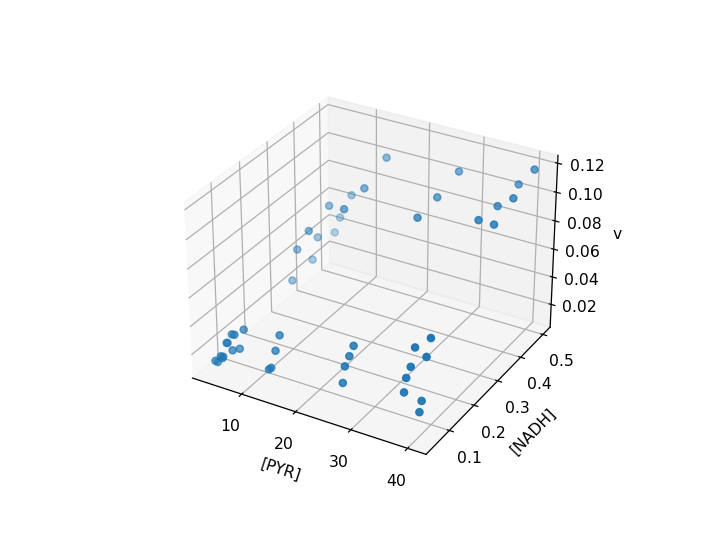

Text(0.5, 0, 'v')

In [28]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.PYR, data.NADH, data.rate)
ax.set_xlabel('[PYR]')
ax.set_ylabel('[NADH]')
ax.set_zlabel('v')

In [29]:
plt.close('all')

In [30]:
def vmax(vf, kb, kc, b ,c): #MM
    return (vf*b*c)/((b+kb)*(c+kc))

In [31]:
pd.concat([data.rate]).shape

(147,)

In [32]:
indiv_rate = np.array(pd.concat([data.rate]))
indiv_NADH = np.array(pd.concat([data.NADH]))
indiv_PYR = np.array(pd.concat([data.PYR]))

In [33]:
datadict = {'rate': indiv_rate, 'NADH': indiv_NADH, 'PYR': indiv_PYR}
fulldata = pd.DataFrame(datadict)

In [34]:
fulldata

,rate,NADH,PYR
0,0.111779,0.500,40.500
1,0.104324,0.500,37.800
2,0.099379,0.500,27.000
3,0.097659,0.500,13.500
4,0.062407,0.500,6.750
...,...,...,...
142,0.005723,0.042,27.000
143,0.019055,0.042,13.500
144,0.026960,0.042,6.750
145,0.006176,0.042,4.450


In [35]:
mymod4 = Model(vmax, independent_vars=['b', 'c'])
mypar4 = mymod4.make_params(vf=1, kNADH=1, kPYR=1)
for p in mypar4:
    mypar4[p].set(min=1e-6, max=1000)
myfit4 = mymod4.fit(fulldata['rate'], params=mypar4, b=fulldata['NADH'], c=fulldata['PYR'],nan_policy='omit')
print(myfit4.fit_report())

[[Model]]
    Model(vmax)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 140
    # variables        = 3
    chi-square         = 0.01198856
    reduced chi-square = 8.7508e-05
    Akaike info crit   = -1305.16232
    Bayesian info crit = -1296.33740
[[Variables]]
    vf:  0.18425243 +/- 0.00734968 (3.99%) (init = 1)
    kb:  0.17118615 +/- 0.01419068 (8.29%) (init = 1e-06)
    kc:  7.64521179 +/- 0.64173860 (8.39%) (init = 1e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(vf, kb) = 0.746
    C(vf, kc) = 0.578


In [36]:
NADHvals = data.NADH.unique()

In [37]:
PYRvals = data.PYR.unique()

In [38]:
data[data.PYR==2]

,Unnamed: 0,Repeat_1,Repeat_2,Repeat_3,Rate,PYR,NADH


<IPython.core.display.Javascript object>


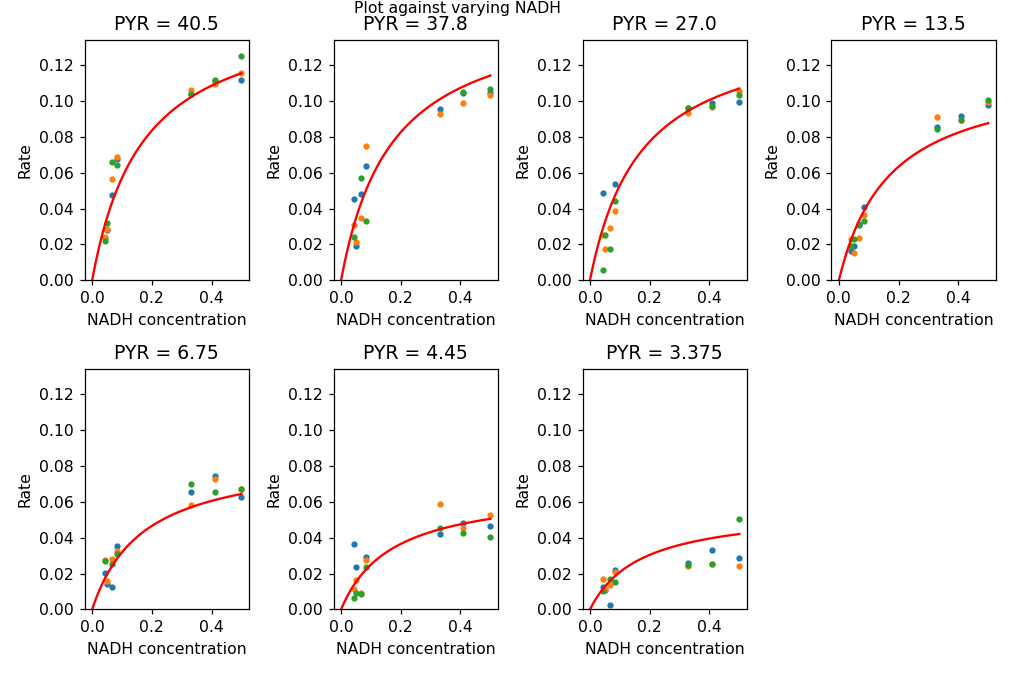

In [42]:
xvals = np.linspace(0, data.NADH.max(), 101)

f, ax = plt.subplots(nrows=2, ncols=4, figsize=(9,6))
for i in range(len(PYRvals)):
    ax[i//4,i%4].plot(data[data.PYR==PYRvals[i]].NADH, data[data.PYR==PYRvals[i]].rate, '.')
    ax[i//4,i%4].plot(xvals, myfit4.eval(myfit4.params, b=xvals, c=PYRvals[i]), 'r-')
    ax[i//4,i%4].set_title('PYR = '+str(PYRvals[i]))
    ax[i//4,i%4].set_xlabel('NADH concentration (mM)')
    ax[i//4,i%4].set_ylabel('Rate (µmol/min/mg prot)')
    ax[i//4,i%4].set_ylim(0, data.Repeat_1.max()*1.2)
ax[1,3].set_visible(False)
f.text(0.35, 0.98,'Plot against varying NADH')
f.tight_layout()

<IPython.core.display.Javascript object>


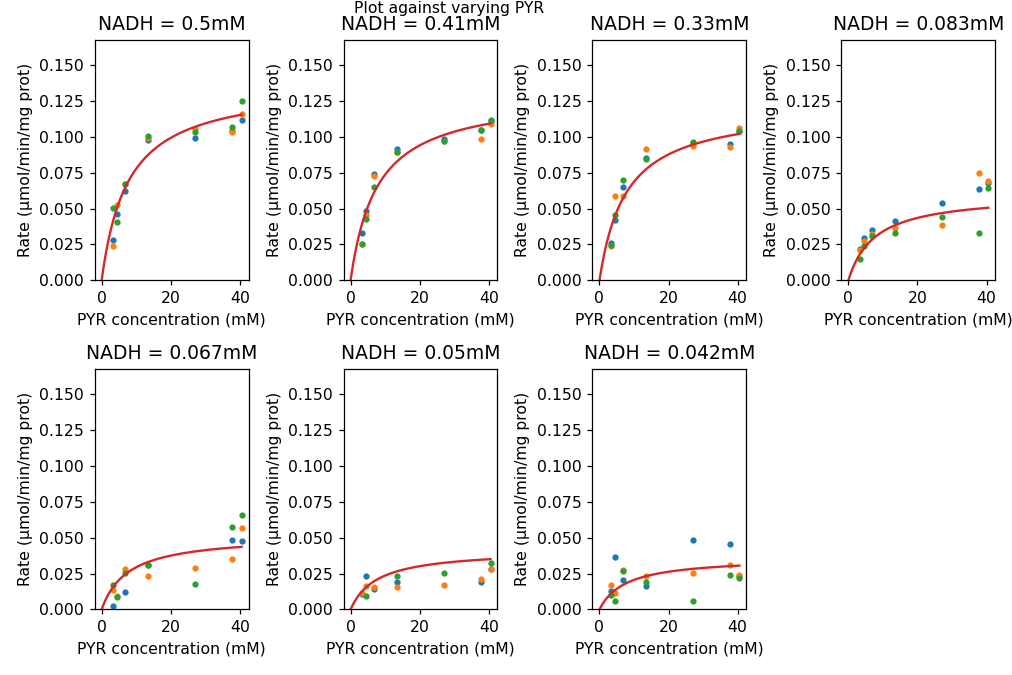

In [47]:
xvals = np.linspace(0, data.PYR.max(), 101)

f, ax = plt.subplots(nrows=2, ncols=4, figsize=(9,6))
for i in range(len(PYRvals)):
    ax[i//4,i%4].plot(data[data.NADH==NADHvals[i]].PYR, data[data.NADH==NADHvals[i]].rate, '.')
    ax[i//4,i%4].plot(xvals, myfit4.eval(myfit4.params, b=NADHvals[i], c=xvals), '-')
    ax[i//4,i%4].set_title('NADH = '+str(NADHvals[i])+str('mM'))
    ax[i//4,i%4].set_xlabel('PYR concentration (mM)')
    ax[i//4,i%4].set_ylabel('Rate (µmol/min/mg prot)')
    ax[i//4,i%4].set_ylim(0, data.rate.max()*1.5)
ax[1,3].set_visible(False)
f.text(0.35, 0.98,'Plot against varying PYR')
f.tight_layout()

In [48]:
plt.close('all')